In [59]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize'] = (20,5)

In [60]:
dataframe_raw = pd.read_csv(r"C:\Users\isaia\Desktop\DF_Raw_Data.csv")
dataframe_stdev = pd.read_csv(r"C:\Users\isaia\Desktop\DF_Rolling_Stdev.csv")

print(dataframe_raw.describe())
print(dataframe_raw.info())

print(dataframe_stdev.describe())
print(dataframe_stdev.info())

       Volumetric Flow Meter 1  Volumetric Flow Meter 2  Pump Speed (RPM)  \
count              2453.000000              2453.000000       2453.000000   
mean                 41.802629                41.796702         90.796576   
std                   3.656576                 3.654873         10.217885   
min                   0.000000                 0.000000          0.000000   
25%                  41.050000                41.000000         85.000000   
50%                  42.100000                42.140000         91.000000   
75%                  43.140000                43.130000         97.000000   
max                  45.900000                45.840000        124.000000   

       Pump Torque   Ambient Temperature  Horse Power  Pump Efficiency  \
count   2453.000000          2453.000000  2453.000000      2453.000000   
mean     202.851610            50.226661     3.540897        76.015149   
std       22.683977             5.298203     0.579055         6.651633   
min       

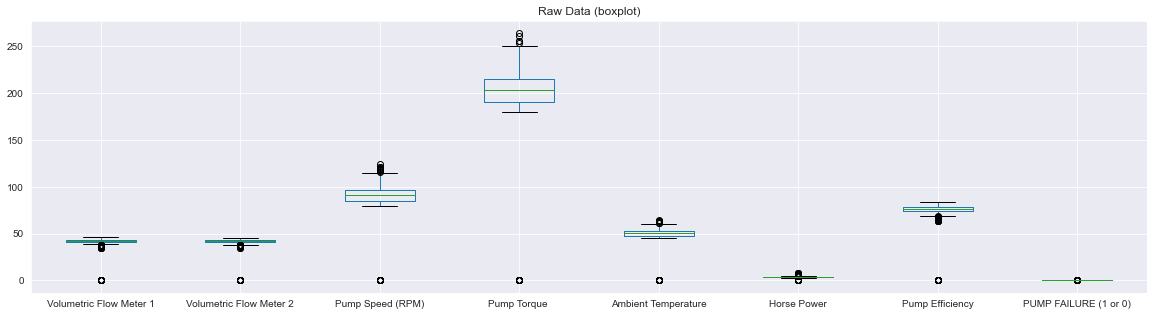

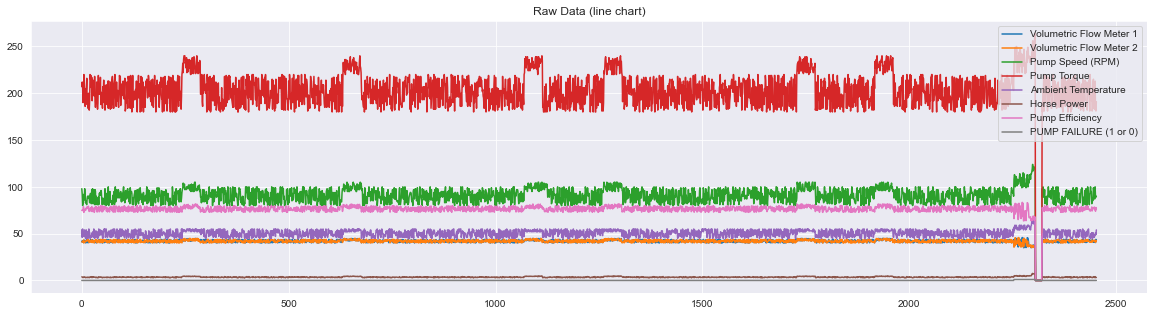

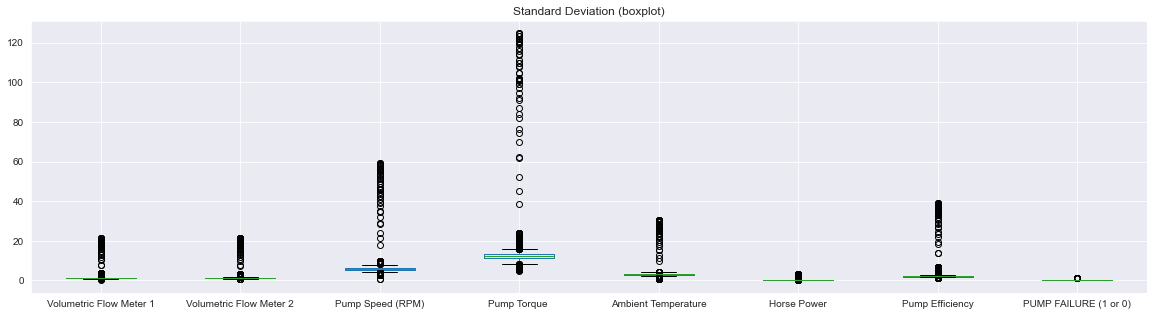

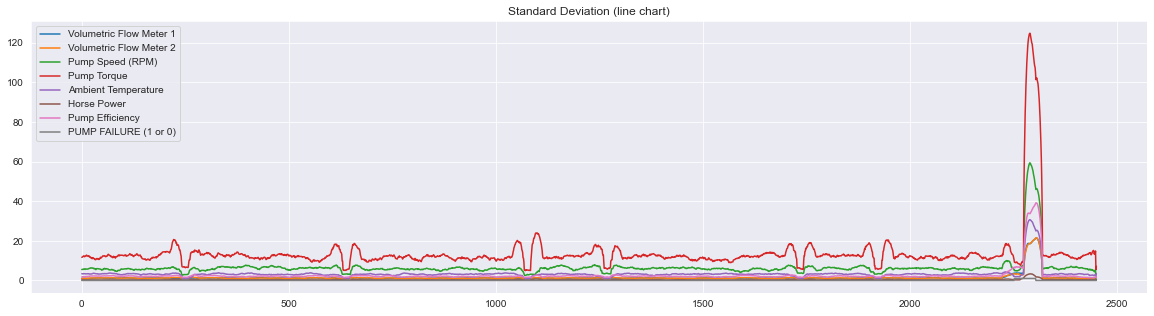

In [61]:
dataframe_raw.plot(kind="box")
plt.title("Raw Data (boxplot)")
dataframe_raw.plot(kind="line")
plt.title("Raw Data (line chart)")

dataframe_stdev.plot(kind="box")
plt.title("Standard Deviation (boxplot)")

dataframe_stdev.plot(kind="line")
plt.title("Standard Deviation (line chart)")
plt.show()

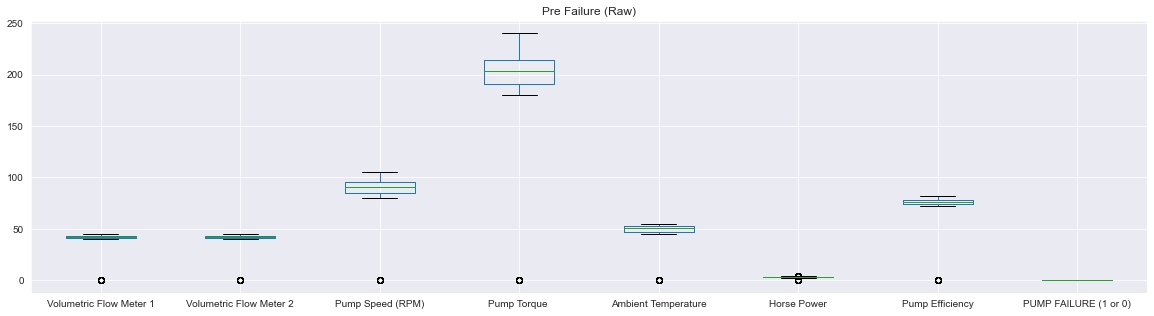

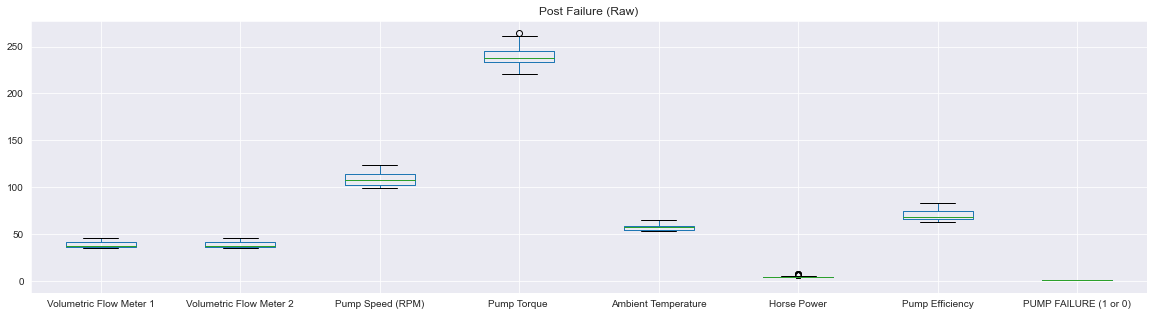

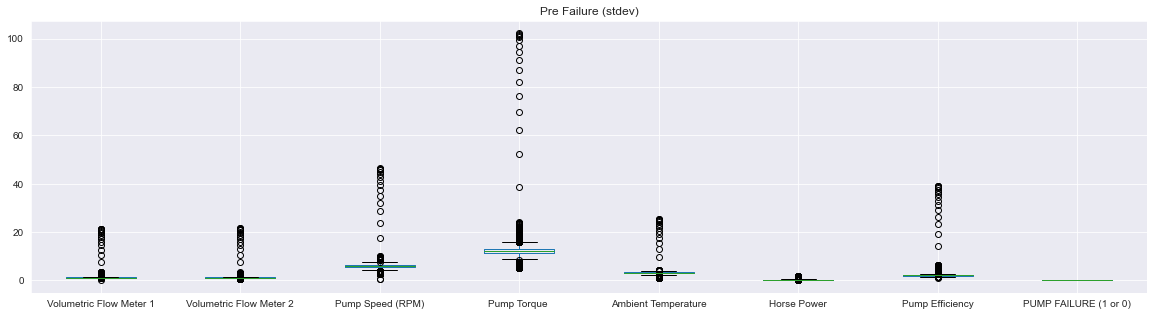

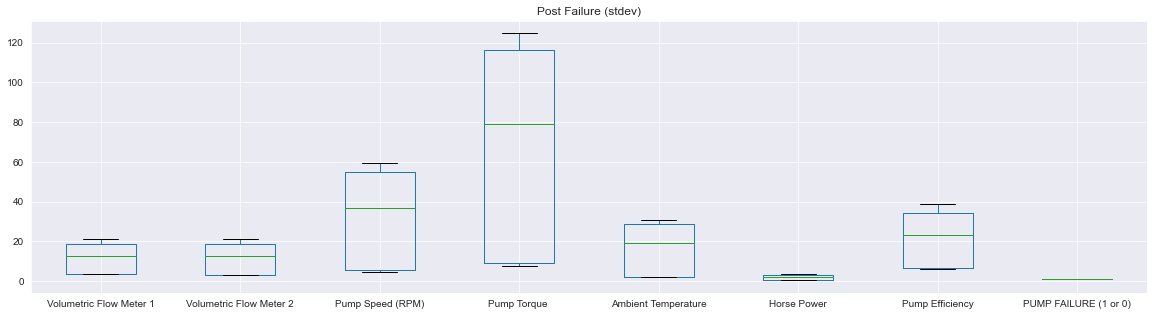

In [62]:
pre_failure = dataframe_raw["PUMP FAILURE (1 or 0)"]== 0
dataframe_raw_0 = dataframe_raw[pre_failure]
dataframe_raw_0.plot(kind="box")
plt.title("Pre Failure (Raw)")

post_failure = dataframe_raw["PUMP FAILURE (1 or 0)"]== 1
dataframe_raw_1 = dataframe_raw[post_failure]
dataframe_raw_1.plot(kind="box")
plt.title("Post Failure (Raw)")

plt.show()

pre_failure_stdev = dataframe_stdev["PUMP FAILURE (1 or 0)"]== 0
dataframe_stdev_0 = dataframe_stdev[pre_failure_stdev]
dataframe_stdev_0.plot(kind="box")
plt.title("Pre Failure (stdev)")

post_failure_stdev = dataframe_stdev["PUMP FAILURE (1 or 0)"]==1
dataframe_stdev_1 = dataframe_stdev[post_failure_stdev]
dataframe_stdev_1.plot(kind="box")
plt.title("Post Failure (stdev)")

plt.show()

In [63]:
Q1 = dataframe_raw.quantile(q=0.25, axis=0)
Q3 = dataframe_raw.quantile(q=0.75, axis=0)
IQR = Q3 - Q1
print(IQR)

Volumetric Flow Meter 1     2.09
Volumetric Flow Meter 2     2.13
Pump Speed (RPM)           12.00
Pump Torque                24.00
Ambient Temperature         5.00
Horse Power                 0.56
Pump Efficiency             3.91
PUMP FAILURE (1 or 0)       0.00
dtype: float64


In [64]:
Lower_Limit = Q1 - 1.5*IQR
Upper_Limit = Q3 + 1.5*IQR

outliers = dataframe_raw[((dataframe_raw < Lower_Limit) | ((dataframe_raw > Upper_Limit))).any(axis=1)]
no_outliers = dataframe_raw[~((dataframe_raw < Lower_Limit) | (dataframe_raw > Upper_Limit)).any(axis=1)]
proportion_outliers = (outliers.count())/(dataframe_raw.count())

print(no_outliers.count())
print(proportion_outliers)

Data Source                2358
TIMEFRAME (DD/MM/YYYY)     2358
Volumetric Flow Meter 1    2358
Volumetric Flow Meter 2    2358
Pump Speed (RPM)           2358
Pump Torque                2358
Ambient Temperature        2358
Horse Power                2358
Pump Efficiency            2358
PUMP FAILURE (1 or 0)      2358
dtype: int64
Data Source                0.038728
TIMEFRAME (DD/MM/YYYY)     0.038728
Volumetric Flow Meter 1    0.038728
Volumetric Flow Meter 2    0.038728
Pump Speed (RPM)           0.038728
Pump Torque                0.038728
Ambient Temperature        0.038728
Horse Power                0.038728
Pump Efficiency            0.038728
PUMP FAILURE (1 or 0)      0.038728
dtype: float64


<ipython-input-65-a6bc4d033ddb>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers[pump_normal_0].plot(kind="box", title="No Outliers Pump Normal", rot=60)
<ipython-input-65-a6bc4d033ddb>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_outliers[pump_fail_1].plot(kind="box", title="No Outliers Pump Failure", rot=60)


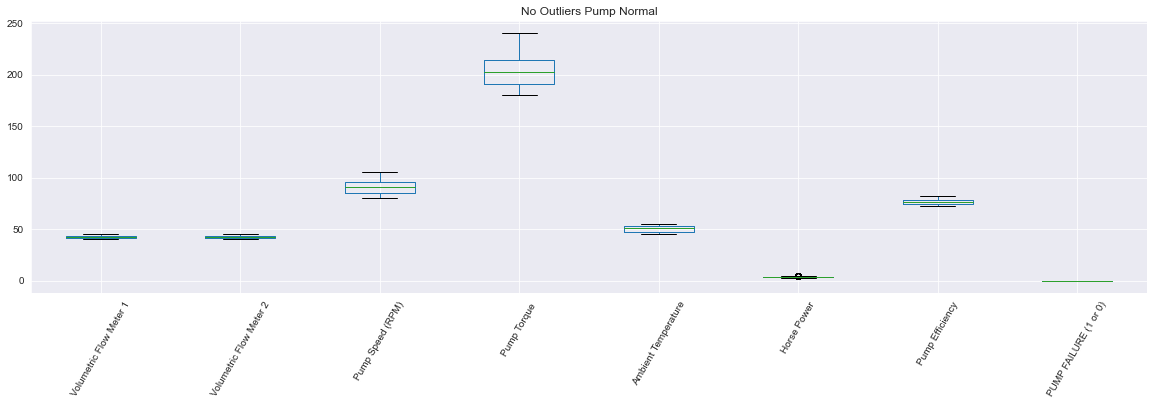

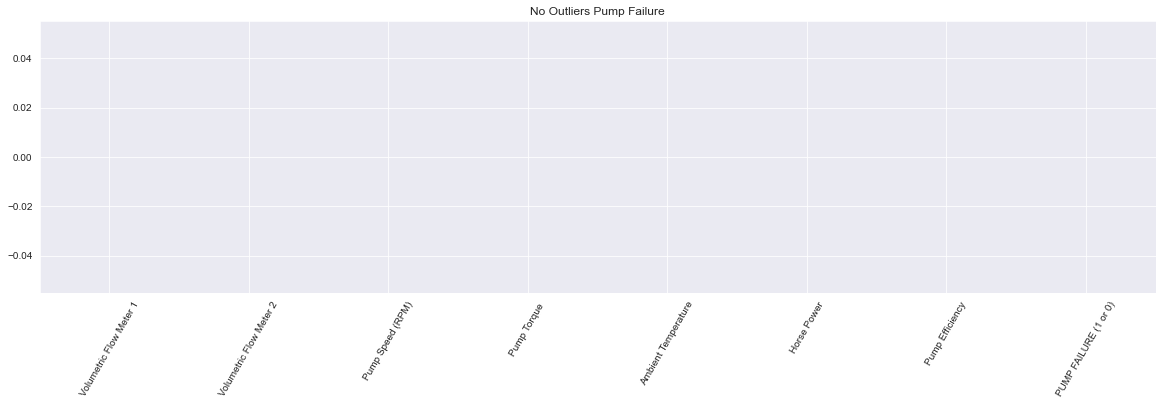

In [65]:
pump_normal_0 = dataframe_raw["PUMP FAILURE (1 or 0)"] == 0
pump_fail_1 = dataframe_raw["PUMP FAILURE (1 or 0)"] == 1

no_outliers[pump_normal_0].plot(kind="box", title="No Outliers Pump Normal", rot=60)
no_outliers[pump_fail_1].plot(kind="box", title="No Outliers Pump Failure", rot=60)
plt.show()

In [66]:
list_of_columns = ["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", 
                     "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency", "PUMP FAILURE (1 or 0)"]
print(list_of_columns)


['Volumetric Flow Meter 1', 'Volumetric Flow Meter 2', 'Pump Speed (RPM)', 'Pump Torque ', 'Ambient Temperature', 'Horse Power', 'Pump Efficiency', 'PUMP FAILURE (1 or 0)']


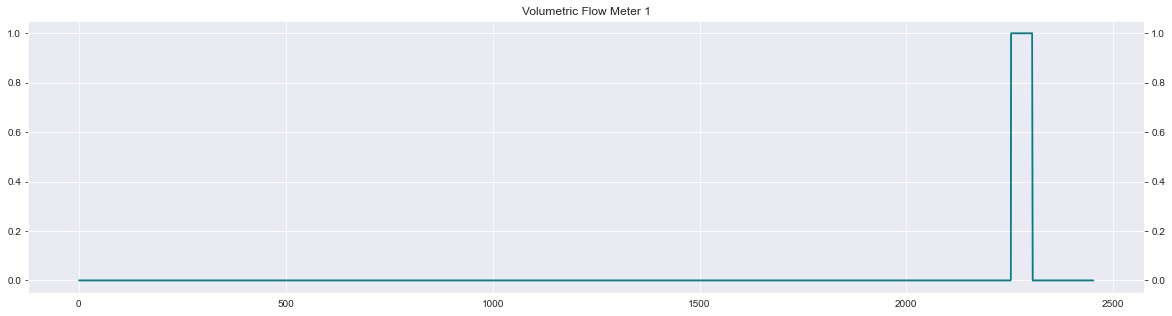

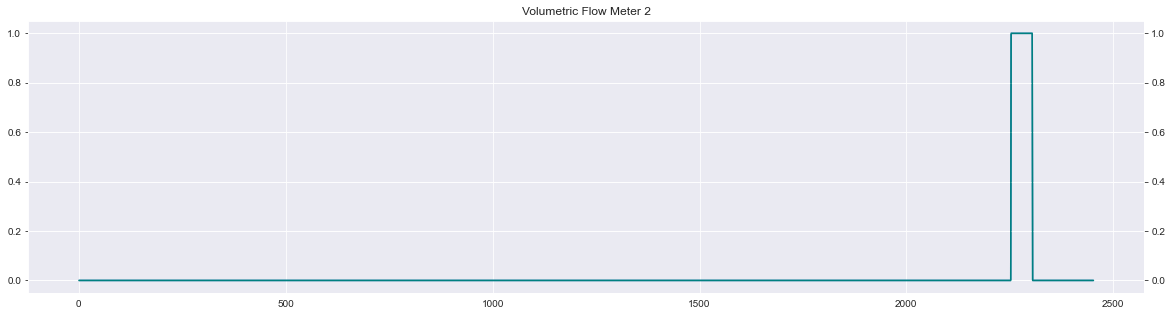

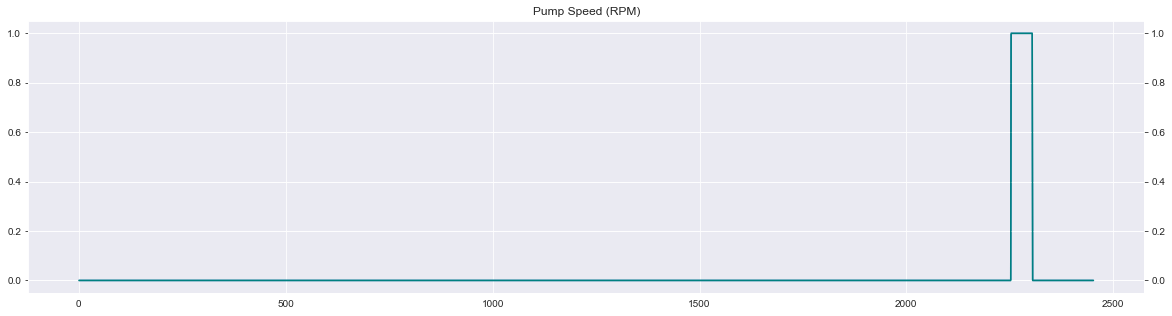

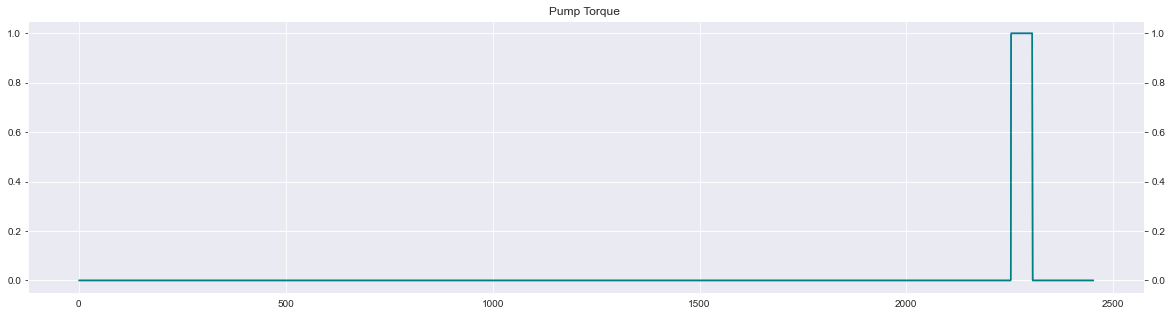

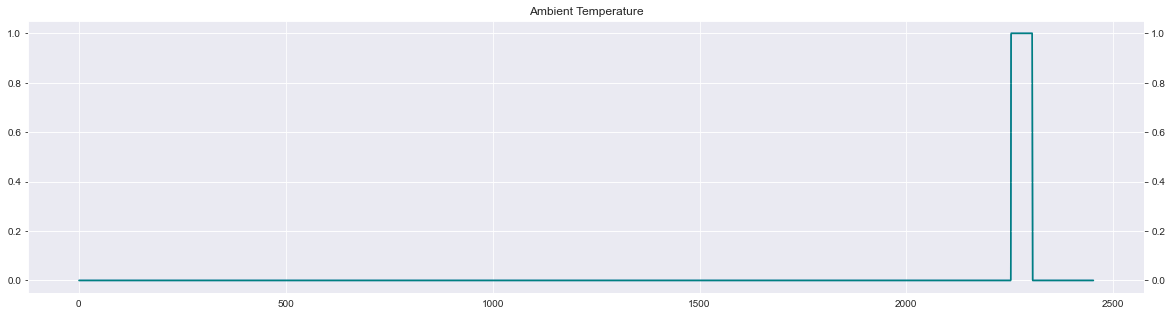

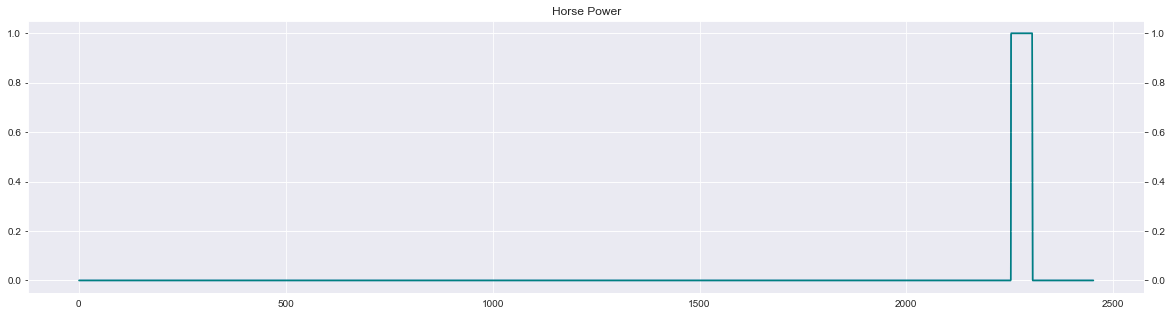

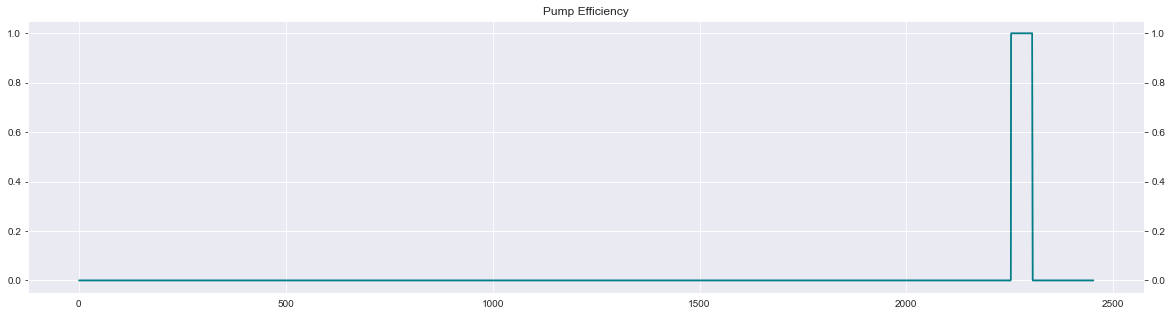

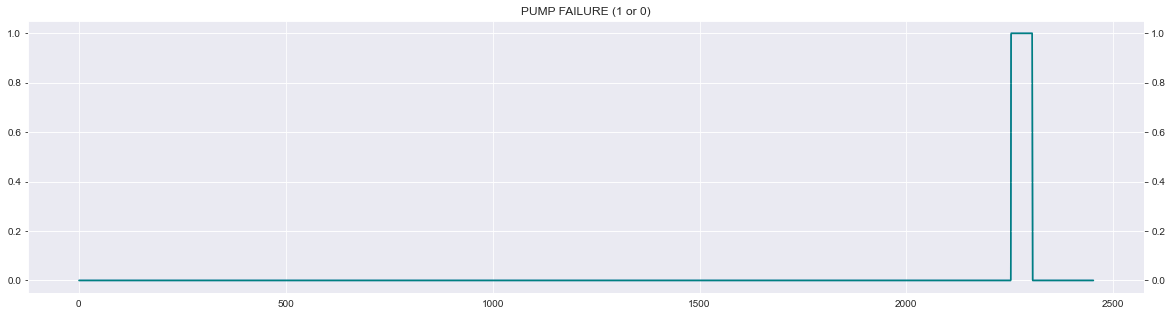

In [67]:
for column in list_of_columns:
    first_axis = dataframe_raw[items].plot()
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_raw["PUMP FAILURE (1 or 0)"], color="teal")
    plt.title(column)
    plt.show()

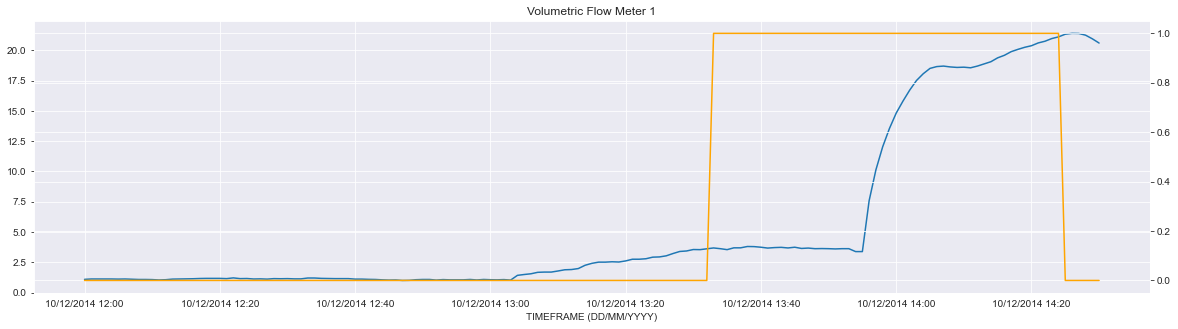

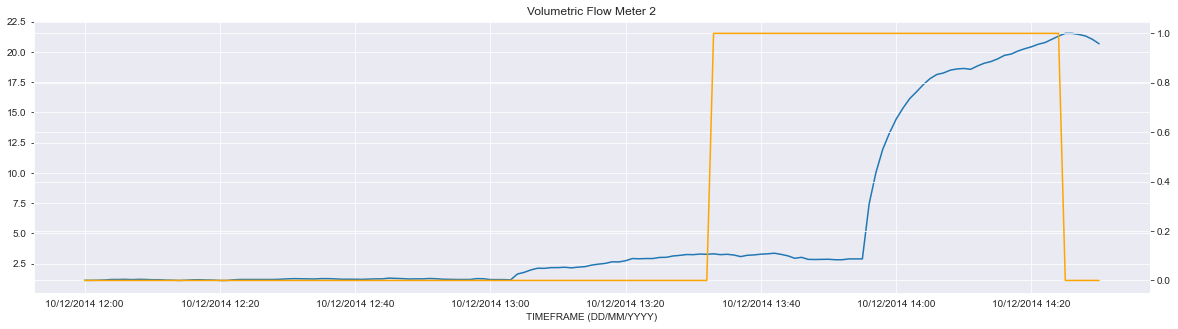

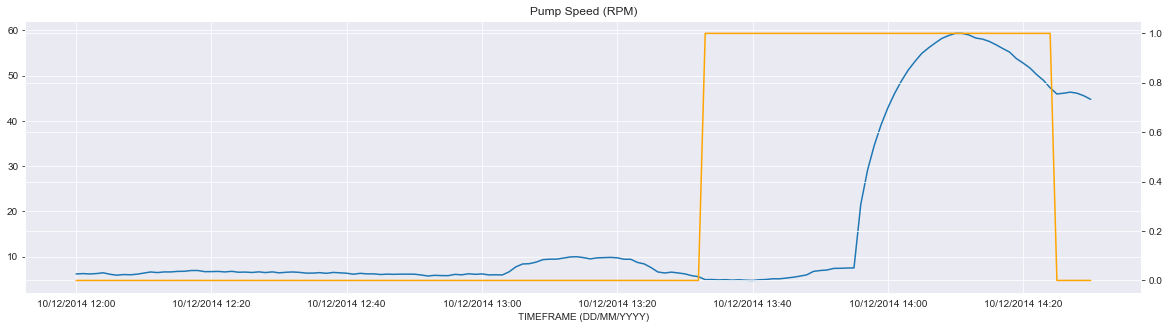

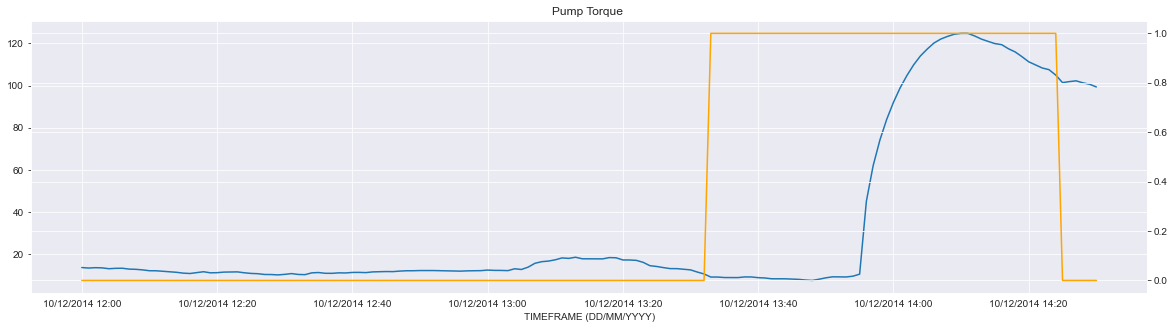

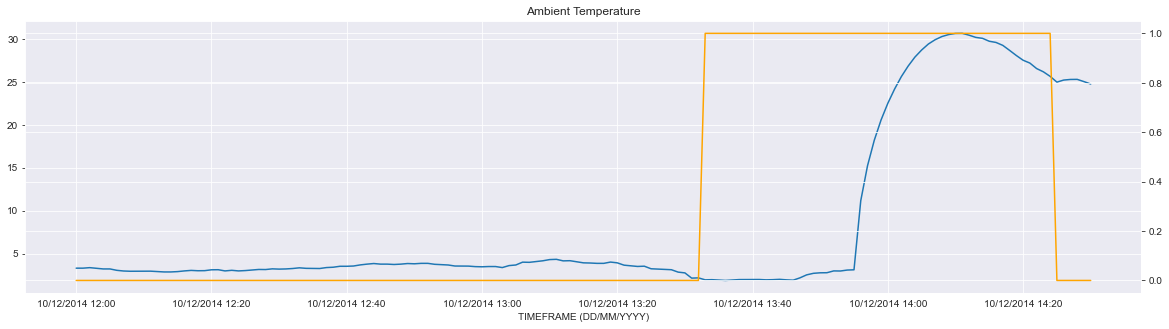

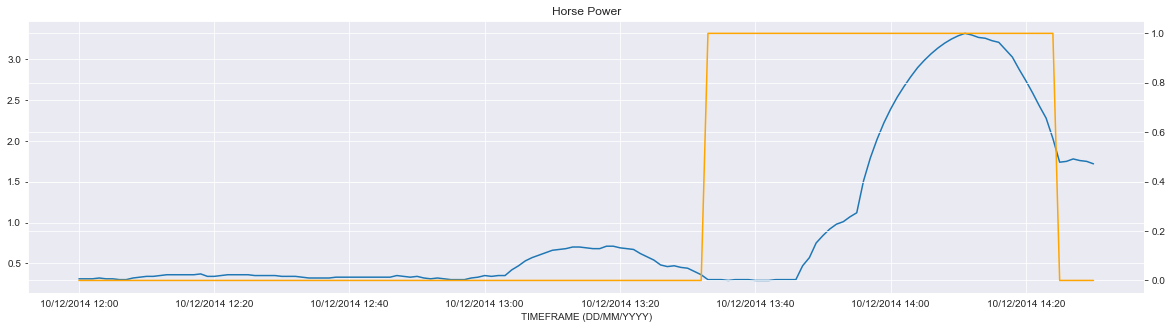

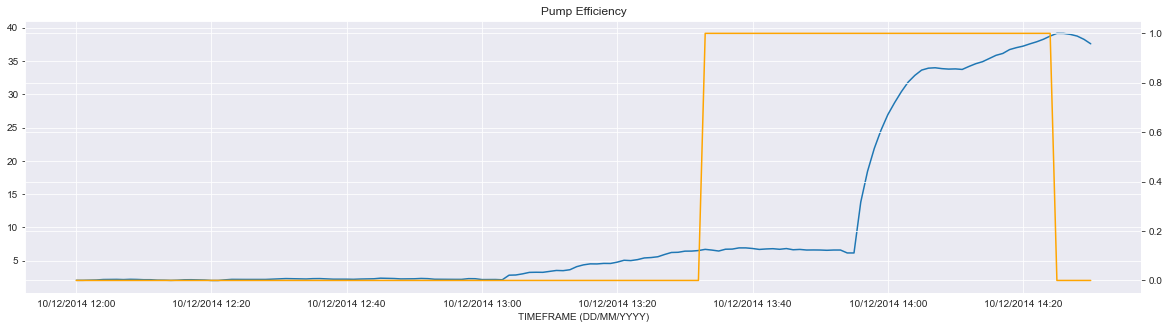

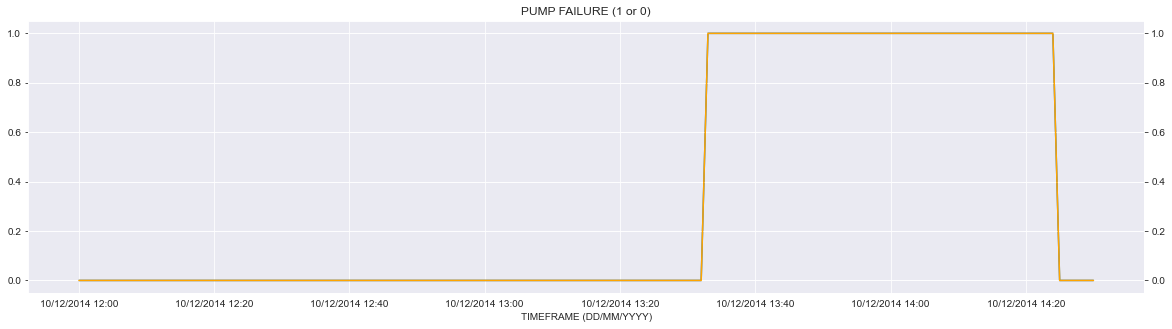

In [68]:
dataframe_stdev.set_index("TIMEFRAME (DD/MM/YYYY)", inplace=True)

dataframe_time_filtered = dataframe_stdev[(dataframe_stdev.index >= "10/12/2014 12:00") & (dataframe_stdev.index <= "10/12/2014 14:30")]

for column in list_of_columns:
    first_axis = dataframe_time_filtered[column].plot()
    first_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    second_axis = first_axis.twinx()
    second_axis.plot(dataframe_time_filtered["PUMP FAILURE (1 or 0)"], color="orange")
    second_axis.xaxis.set_major_locator(plt.MaxNLocator(10))
    plt.title(column)
    plt.show()
    

<AxesSubplot:>

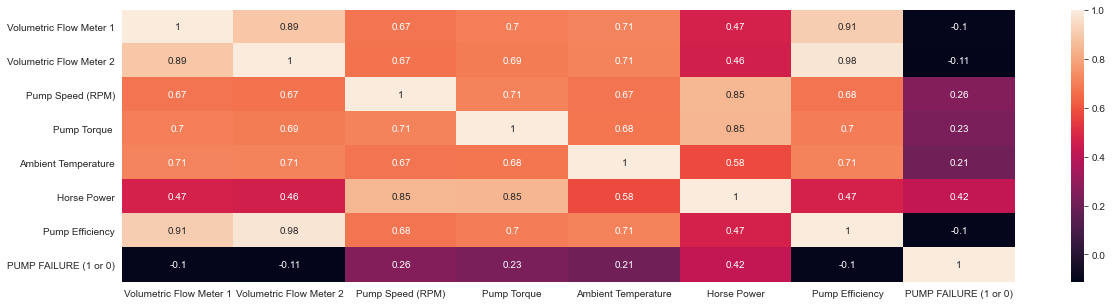

In [69]:
# Part II, Step 10

sns.heatmap(dataframe_raw.corr(), annot=True)


<AxesSubplot:>

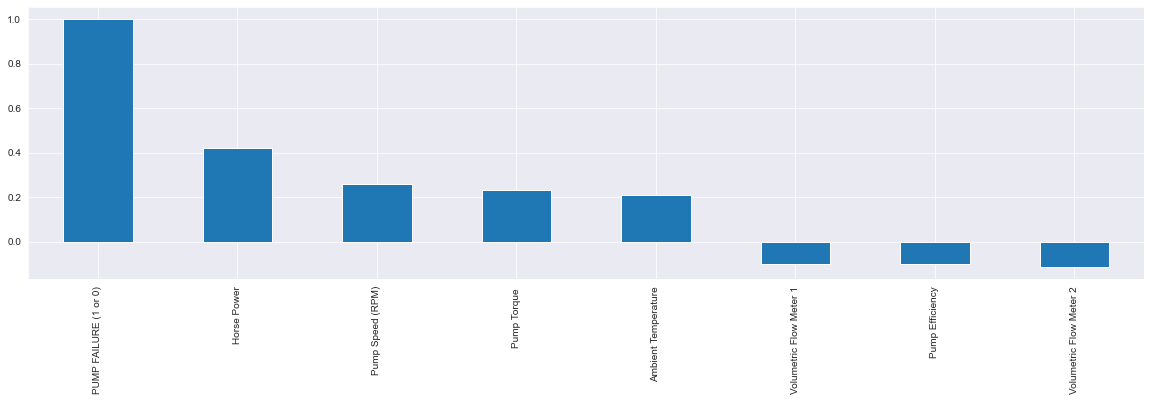

In [70]:
corr = dataframe_raw.corr()
corr['PUMP FAILURE (1 or 0)'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:>

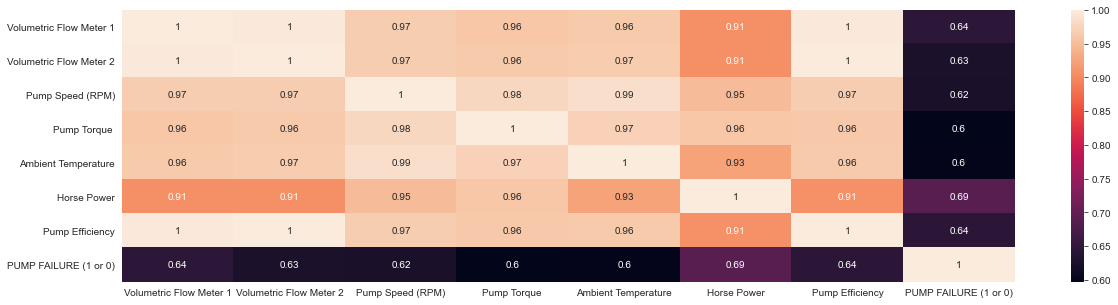

In [71]:
sns.heatmap(dataframe_stdev.corr(), annot=True)

In [78]:
dataframe_raw = pd.read_csv(r"C:\Users\isaia\Desktop\DF_Raw_Data.csv")

dependent_variables = dataframe_raw['PUMP FAILURE (1 or 0)']

independent_variables = dataframe_raw[["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", 
                     "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]]

independent_variables = sm.add_constant(independent_variables)

regression_model = sm.OLS(dependent_variables, independent_variables).fit()

regression_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.362
Model:                               OLS   Adj. R-squared:                  0.360
Method:                    Least Squares   F-statistic:                     197.9
Date:                   Fri, 29 Apr 2022   Prob (F-statistic):          5.58e-233
Time:                           19:15:13   Log-Likelihood:                 1823.0
No. Observations:                   2453   AIC:                            -3630.
Df Residuals:                       2445   BIC:                            -3583.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1138      0.028      4.058      0.000       0.059       0.169
Volumetric Flow Meter 1    -0.0145      0.002     -7.974      0.000      -0.018      -0.011
Volumetric Flow Meter 2    -0.0184      0.003     -5.497      0.000      -0.025      -0.012
Pump Speed (RPM)            0.0021      0.001      2.589      0.010       0.001       0.004
Pump Torque                 0.0007      0.000      1.801      0.072   -6.24e-05       0.001
Ambient Temperature         0.0099      0.001     14.159      0.000       0.009       0.011
Horse Power                 0.0827      0.019      4.373      0.000       0.046       0.120
Pump Efficiency             0.0020      0.002      1.028      0.304      -0.002       0.006
==============================================================================
Omnibus:                     2071.669   Durbin-Watson:                   0.458
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            58977.621
Skew:                           3.929   Prob(JB):                         0.00
Kurtosis:                      25.700   Cond. No.                     3.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
dataframe_stdev = pd.read_csv(r"C:\Users\isaia\Desktop\DF_Rolling_Stdev.csv")

dependent_variables_stdev = dataframe_stdev['PUMP FAILURE (1 or 0)']

independent_variables_stdev = dataframe_stdev[["Volumetric Flow Meter 1", "Volumetric Flow Meter 2", 
                     "Pump Speed (RPM)", "Pump Torque ", "Ambient Temperature", "Horse Power", "Pump Efficiency"]]

independent_variables_stdev = sm.add_constant(independent_variables_stdev)

regression_model_stdev = sm.OLS(dependent_variables_stdev, independent_variables_stdev).fit()

regression_model_stdev.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     PUMP FAILURE (1 or 0)   R-squared:                       0.778
Model:                               OLS   Adj. R-squared:                  0.778
Method:                    Least Squares   F-statistic:                     1225.
Date:                   Fri, 29 Apr 2022   Prob (F-statistic):               0.00
Time:                           19:46:56   Log-Likelihood:                 3117.4
No. Observations:                   2452   AIC:                            -6219.
Df Residuals:                       2444   BIC:                            -6172.
Df Model:                              7                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0354      0.004    -10.045      0.000      -0.042      -0.029
Volumetric Flow Meter 1     0.0513      0.010      5.109      0.000       0.032       0.071
Volumetric Flow Meter 2    -0.6085      0.020    -30.450      0.000      -0.648      -0.569
Pump Speed (RPM)           -0.0178      0.002     -9.057      0.000      -0.022      -0.014
Pump Torque                -0.0189      0.001    -22.511      0.000      -0.020      -0.017
Ambient Temperature         0.0178      0.003      5.773      0.000       0.012       0.024
Horse Power                 0.7636      0.022     35.045      0.000       0.721       0.806
Pump Efficiency             0.3407      0.012     28.118      0.000       0.317       0.364
==============================================================================
Omnibus:                     1432.369   Durbin-Watson:                   0.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            72092.923
Skew:                           2.052   Prob(JB):                         0.00
Kurtosis:                      29.245   Cond. No.                         426.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Pump Failure Coefficients')

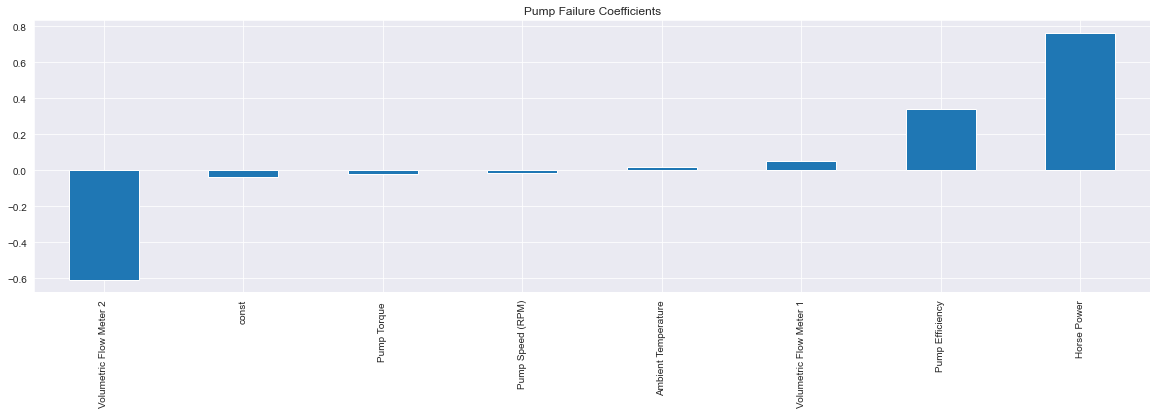

In [86]:
regression_model_stdev.params.sort_values(ascending=True).plot(kind='bar')
plt.title("Pump Failure Coefficients")

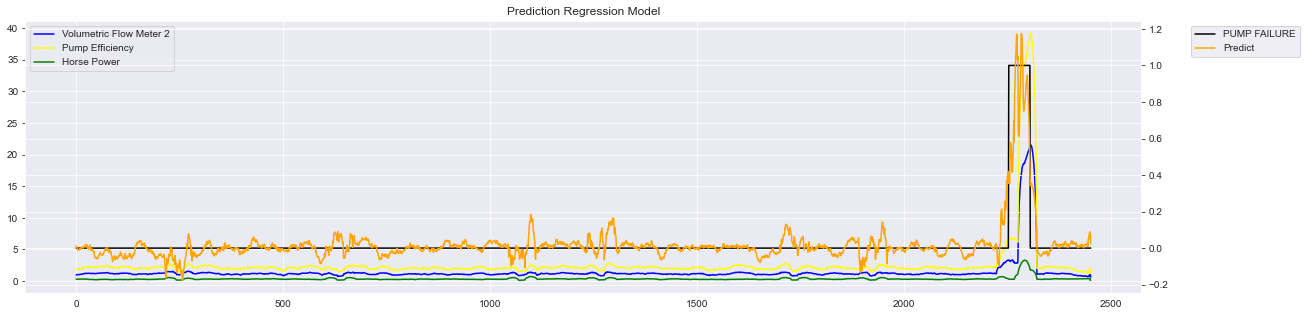

In [97]:
dataframe_stdev["Prediction"] = regression_model_stdev.predict(independent_variables_stdev)

axis_1 = dataframe_stdev[["Volumetric Flow Meter 2", "Pump Efficiency", "Horse Power"]].plot(color=("blue", "yellow", "green"))
axis_1.legend()

axis_2 = axis_1.twinx()
axis_2.plot(dataframe_stdev["PUMP FAILURE (1 or 0)"], color = "black", label = "PUMP FAILURE")
axis_2.plot(dataframe_stdev["Prediction"], color = "orange", label = "Predict")
axis_2.legend(loc="upper left", bbox_to_anchor = (1.04, 1))

plt.title("Prediction Regression Model")
plt.show()